PART 1 

In [1]:
import sys
import pandas as pd
import numpy as np
import operator
import math
from matplotlib import pyplot as plt

In [ ]:
#Taking input of test file path
testfile = sys.argv[1]

In [2]:
#Adding column names to dataset
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('C:/Users/sarat/Desktop/assignment 2/Iris/Iris.csv',header = None,names = col_names)

In [3]:
X = iris
y = iris.species

In [4]:
# Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test = X_test.drop('species',1)

In [5]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(a, b)]))

In [6]:
#Utility function to give maximum occurance of value among k values
def max_occur(k_near):
    ans = {}
    for i in list(k_near.keys()):
        if(k_near[i] not in ans):
            ans[k_near[i]] = 1
        else:
            ans[k_near[i]]+=1
    return max(ans.items(), key=operator.itemgetter(1))[0]

In [7]:
#K-NN algorithm
def knn(X_test,X_train,k):
    predict_Y = []
    for i in range(len(X_test)):
        k_near = {}
        for j in range(len(X_train)):
            k_dist = dist(list(X_test.iloc[i,:]),list(X_train.iloc[j,0:4]))
            if(len(k_near)<k):
                k_near[k_dist] = X_train.iloc[j,4]
                max_k_near = max(k_near.keys())
            else:
                if(k_dist<max_k_near):
                    del k_near[max_k_near]
                    k_near[k_dist] = X_train.iloc[j,4]
                    max_k_near = max(k_near.keys())
        predict_Y.append(max_occur(k_near))
    return predict_Y            

In [8]:
#predicted values of testing data
y_predict = knn(X_test,X_train,5)

In [9]:
#Accuracy calculation
def compare(y_predict,y_test):
    index = {'Iris-versicolor':1,'Iris-virginica':2,'Iris-setosa':0}
    matrix = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(y_test)):
        matrix[index[y_test[i]]][index[y_predict[i]]]+=1
    precision = []
    recall = []
    f1score = []
    count = 0
    for i in range(len(y_test)):
        if(y_predict[i]==y_test[i]):
            count+=1
    accuracy = count/len(y_test)
    for i in range(3):
        num = matrix[i][i]
        den1 = 0
        den2 = 0
        for j in range(3):
            den1 +=matrix[j][i]
            den2 += matrix[i][j]
        val1 = num/den1
        val2 = num/den2
        val3 = 2*(val1*val2)/(val1+val2)
        precision.append(round(val1,2))
        recall.append(round(val2,2))
        f1score.append(round(val3,2))
    print("                   precision    recall     f1-score")
    print("Iris-setosa       ",precision[0],"        ",recall[0],"      ",f1score[0])
    print("Iris-versicolor   ",precision[1],"        ",recall[1],"     ",f1score[1])
    print("Iris-virginica    ",precision[2],"       ",recall[2],"      ",f1score[2])
    print("Accuracy : ",accuracy)
    return

In [10]:
print("-------------Validation---------------------")
compare(y_predict,list(y_test))

-------------Validation---------------------
                   precision    recall     f1-score
Iris-setosa        1.0          1.0        1.0
Iris-versicolor    1.0          0.89       0.94
Iris-virginica     0.91         1.0        0.95
Accuracy :  0.96


TESTING DATA

In [116]:
td1 = pd.read_csv(testfile,header = None,names = col_names)
tX1 = td1.drop('species',1)
ty1 = td1['species']
ty1_predict = knn(tX1,X_train,3)
print("-------For IRIS test data -------")
compare(ty1_predict,list(ty1))

-------For IRIS test data -------
                   precision    recall     f1-score
Iris-setosa        1.0          1.0        1.0
Iris-versicolor    1.0          0.75       0.86
Iris-virginica     0.75         1.0        0.86
Accuracy :  0.9166666666666666


Using scikit learn

In [11]:
from sklearn.metrics import confusion_matrix
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = [iris_class[i] for i in iris.species]
X = iris.drop(['species', 'species_num'], axis=1)
y = iris.species_num
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
Knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
Knn.fit(X_train, y_train)
## See how the model performs on the test data.
Knn.score(X_test, y_test)

0.967741935483871

PART 2

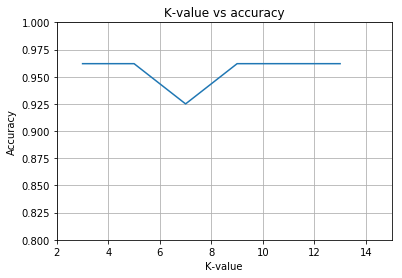

In [12]:
#plotting graph with k value as X-axis and accuracy as y-axis
x = [3,5,7,9,11,13]
y = [0.962,0.962,0.925,0.962,0.962,0.962]
plt.plot(x,y)
plt.title("K-value vs accuracy")
plt.axis([2,15,0.8,1.0])
plt.ylabel('Accuracy')
plt.xlabel('K-value')
plt.grid(True)

Larger value of k gives smoother boundary, which overall reduces the noise in dataset and improving overall accuracy.